#### Import Modules

In [1]:
# Regular imports
import os
import random
import numpy as np
import pandas as pd
import json
import time
import pickle
from pandas import DataFrame
import matplotlib.pyplot as plt

# Metrics and 
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Tensorflow
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model
from tensorflow.keras.utils import plot_model
from attention import Attention

2023-10-22 03:50:06.825303: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-22 03:50:06.934815: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-22 03:50:06.934853: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-22 03:50:06.935545: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-22 03:50:06.990826: I tensorflow/core/platform/cpu_feature_g

In [2]:
# print(tf.reduce_sum(tf.random.normal([1000, 1000])))

In [3]:
# set pandas to show all columns
pd.set_option('display.max_columns', None)

In [4]:
# Set seeds to make the experiment more reproducible.
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

seed = 0
seed_everything(seed)

In [5]:
# Load the dataset
# data = pd.read_csv('../data/interim/grouped_File1.csv', parse_dates=['index'], index_col=0)
data = pd.read_csv('../data/interim/concatenated_data.csv', parse_dates=['index'], index_col=0)

In [6]:
data.head(10)

1392   1951   1491   1194   1804   1048   1802   1287  \
index                                                                         
2009-07-15 00:30:00  0.157  0.165  0.019  0.399  0.096  0.148  0.910  0.840   
2009-07-15 01:00:00  0.144  0.112  0.112  0.305  0.126  0.225  0.514  0.986   
2009-07-15 01:30:00  0.140  0.014  0.018  0.280  0.086  0.200  0.351  1.432   
2009-07-15 02:00:00  0.138  0.014  0.011  0.245  0.123  0.143  0.243  1.576   
2009-07-15 02:30:00  0.140  0.041  0.111  0.389  0.100  0.200  0.258  1.428   
2009-07-15 03:00:00  0.145  0.115  0.018  0.102  0.181  0.248  0.284  1.268   
2009-07-15 03:30:00  0.145  0.069  0.013  0.139  0.178  0.160  0.330  0.966   
2009-07-15 04:00:00  0.144  0.014  0.115  0.102  0.148  0.161  0.225  1.220   
2009-07-15 04:30:00  0.141  0.014  0.012  0.167  0.108  0.234  0.044  1.135   
2009-07-15 05:00:00  0.142  0.035  0.011  0.140  0.096  0.163  0.013  0.905   

                      1529   1463   1860   1922   1334   1604   1042   1494  \
index                                                                         
2009-07-15 00:30:00  0.407  0.138  0.156  0.085  0.165  0.429  0.477  0.252   
2009-07-15 01:00:00  0.421  0.337  0.172  0.203  0.230  0.149  0.481  0.213   
2009-07-15 01:30:00  0.281  0.223  0.220  0.134  0.098  0.249  0.264  0.131   
2009-07-15 02:00:00  0.142  0.280  0.269  0.062  0.306  0.151  0.194  0.175   
2009-07-15 02:30:00  0.208  0.159  0.194  0.062  0.168  0.173  0.147  0.245   
2009-07-15 03:00:00  0.233  0.163  0.164  0.201  0.258  0.148  0.086  0.170   
2009-07-15 03:30:00  0.079  0.195  0.157  0.140  0.214  0.223  0.044  0.152   
2009-07-15 04:00:00  0.079  0.127  0.199  0.062  0.122  0.175  0.081  0.220   
2009-07-15 04:30:00  0.163  0.300  0.132  0.066  0.249  0.170  0.086  0.196   
2009-07-15 05:00:00  0.170  0.237  0.189  0.190  0.137  0.152  0.047  0.128   

                      1078   1984   1083   1978   1481   1524   1637   1783  \
index                                                                         
2009-07-15 00:30:00  0.135  0.256  0.634  0.817  3.325  0.014  0.048  0.109   
2009-07-15 01:00:00  0.067  0.271  0.595  0.855  3.031  0.027  0.122  0.136   
2009-07-15 01:30:00  0.118  0.327  0.411  0.823  0.427  0.040  0.120  0.162   
2009-07-15 02:00:00  0.081  0.219  0.321  0.827  0.424  0.000  0.049  0.988   
2009-07-15 02:30:00  0.106  0.162  0.143  0.816  0.338  0.040  0.150  0.577   
2009-07-15 03:00:00  0.100  0.157  0.167  0.816  0.262  0.032  0.095  0.305   
2009-07-15 03:30:00  0.094  0.043  0.159  0.842  0.260  0.008  0.055  0.144   
2009-07-15 04:00:00  0.115  0.152  0.119  0.833  0.238  0.040  0.158  0.207   
2009-07-15 04:30:00  0.078  0.078  0.293  0.808  0.250  0.009  0.048  0.183   
2009-07-15 05:00:00  0.122  0.071  0.200  0.804  0.259  0.030  0.110  0.207   

                      1539   1777   1518   1698   1094   1302   1824   1957  \
index                                                                         
2009-07-15 00:30:00  0.156  0.136  0.659  0.082  0.435  0.213  0.172  0.098   
2009-07-15 01:00:00  0.145  0.088  0.703  0.053  0.360  0.173  0.120  0.096   
2009-07-15 01:30:00  0.145  0.199  0.631  0.106  0.223  0.186  0.118  0.097   
2009-07-15 02:00:00  0.155  0.185  0.630  0.125  0.218  0.144  0.115  0.096   
2009-07-15 02:30:00  0.131  0.088  0.708  0.054  0.320  0.178  0.185  0.096   
2009-07-15 03:00:00  0.880  0.111  0.635  0.055  0.245  0.164  0.133  0.097   
2009-07-15 03:30:00  0.190  0.249  0.648  0.143  0.118  0.158  0.113  0.097   
2009-07-15 04:00:00  0.171  0.101  0.708  0.087  0.118  0.177  0.112  0.097   
2009-07-15 04:30:00  0.154  0.087  0.642  0.054  0.136  0.140  0.163  0.097   
2009-07-15 05:00:00  0.101  0.184  0.643  0.091  0.218  0.184  0.154  0.097   

                      1020   1502   1625   1817   1196   1320   1105   1870  \
index                                                                         
2009-07-15 00:30:00  0.223  0.015  0.798  0.358  0.110  1.545  1.303

In [7]:
def structure_data(dataset, n_future, n_past):
    """
    This function is used to split the data into features and targets, structuring the training
    data to look like the number of days backward the model should look, and the number of days forward
    the model should predict.
    
    Returns:
        dataX: features
        dataY: targets
    """

    dataX = []
    dataY = []
    
    for i in range(n_past, len(dataset) - n_future +1):
        dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
        dataY.append(dataset[i + n_future - 1:i + n_future, -1])
        
    dataX, dataY = np.array(dataX), np.array(dataY)
    
    return dataX, dataY

In [8]:
def filterData(raw_path: str, dataframe: DataFrame):
    # Load filter codes data
    label_data = pd.read_excel(f'{raw_path}/CER_Electricity_Documentation/SME and Residential allocations.xlsx',
                        sheet_name='Sheet1',
                        usecols=['ID', 'Code', 'Residential - Tariff allocation', 'Residential - stimulus allocation', 'SME allocation']
                    )
    
    # Get control meters
    control_meters = []
    for i in range(len(label_data)):
        if label_data['Residential - Tariff allocation'][i] == 'E' or\
        label_data['Residential - stimulus allocation'][i] == 'E' or\
        label_data['SME allocation'][i] == 'C':
            control_meters.append(str(label_data['ID'][i]))

    # Filter out control Meters from concatenated data
    filtered_data = dataframe.drop(columns=control_meters)
    return filtered_data

In [9]:
def removeMissingValues(dataframe: DataFrame, threshold = 0.20) -> DataFrame:
    cols = []
    for i in dataframe.columns:
        if dataframe[i].isna().sum() > len(dataframe)*threshold:
            cols.append(i)
    dataframe = dataframe.drop(columns=cols)
    return dataframe

In [10]:
def sumAllRows(dataframe: pd.DataFrame) -> pd.DataFrame:

    # Sum all rows along axis 1
    row_sums = dataframe.sum(axis=1)

    # Create a new DataFrame with only the row sums
    result_df = pd.DataFrame({'kWh': row_sums})
    
    return result_df

In [11]:

filtered_data = filterData('../data/raw', data)
cleaned_data = removeMissingValues(filtered_data)
summed_df = sumAllRows(cleaned_data)

In [12]:
summed_df

,kWh
index,
2009-07-15 00:30:00,2248.218
2009-07-15 01:00:00,1920.020
2009-07-15 01:30:00,1696.260
2009-07-15 02:00:00,1555.331
2009-07-15 02:30:00,1438.985
...,...
2011-01-01 22:00:00,4120.102
2011-01-01 22:30:00,3881.822
2011-01-01 23:00:00,3729.685


In [13]:
summed_df.isna().sum()

kWh    0
dtype: int64

In [14]:
type(summed_df.kWh.iloc[0])

numpy.float64

In [15]:
scaler = MinMaxScaler()
scaler = scaler.fit(summed_df)
scaled_summed_df = scaler.transform(summed_df)

In [16]:
scaled_summed_df

array([[0.16605012],
       [0.11031196],
       [0.0723106 ],
       ...,
       [0.417649  ],
       [0.43300799],
       [0.40247732]])

#### Train-Test Split


In [17]:
future = 1
past = 48 * 30
X, y = structure_data(scaled_summed_df, n_future=future, n_past=past)

In [18]:
X.shape

(24286, 1440, 1)

In [19]:
y[0]

array([0.17400959])

In [20]:
# Time series train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [21]:
X_train.shape

(19428, 1440, 1)

In [22]:
X_test.shape

(4858, 1440, 1)

In [23]:
y_test.shape

(4858, 1)

#### Train Model

In [24]:
# This is to configure GPU and avoid OOM error by setting GPU memory consumption growth
try:
    gpus = tf.config.list_physical_devices('GPU')
except Exception as e:
    print("Error configuring GPU: \n", e)

if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(gpus)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-10-22 03:50:24.784971: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-22 03:50:24.798095: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-22 03:50:24.798236: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [25]:
# Define Hyperparameters
version = "0.2.4-fulldata"
serie_size =  X_train.shape[1]
n_features =  X_train.shape[2]

epochs = 100
patience = int(np.sqrt(epochs))
batch = 20
lr = 0.00001

In [26]:
from tensorflow.keras.layers import Bidirectional, Dropout, BatchNormalization

# Build the improved model
improved_encoder_decoder = Sequential()
improved_encoder_decoder.add(Bidirectional(L.LSTM(serie_size, activation='tanh', input_shape=(serie_size, n_features), return_sequences=True)))
improved_encoder_decoder.add(L.LSTM(256, activation='tanh', return_sequences=True))
improved_encoder_decoder.add(L.LSTM(128, activation='tanh', return_sequences=True))
improved_encoder_decoder.add(L.LSTM(64, activation='tanh', return_sequences=False))
improved_encoder_decoder.add(BatchNormalization())
improved_encoder_decoder.add(L.RepeatVector(serie_size))
improved_encoder_decoder.add(L.LSTM(serie_size, activation='tanh', return_sequences=True))
improved_encoder_decoder.add(BatchNormalization())
improved_encoder_decoder.add(L.LSTM(64, activation='tanh', return_sequences=True))
improved_encoder_decoder.add(L.LSTM(128, activation='tanh', return_sequences=True))
improved_encoder_decoder.add(L.LSTM(256, activation='tanh', return_sequences=True))
improved_encoder_decoder.add(Bidirectional(L.LSTM(128, activation='tanh', return_sequences=False)))
improved_encoder_decoder.add(Dropout(0.2))
improved_encoder_decoder.add(L.Dense(1))

# Compile the model
adam = optimizers.Adam(lr)
improved_encoder_decoder.compile(loss='mse', optimizer=adam)

# Print model summary
improved_encoder_decoder.build(input_shape=(None, serie_size, n_features))
encoder_decoder = improved_encoder_decoder
encoder_decoder.summary()

2023-10-22 03:50:24.813490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-22 03:50:24.813657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-22 03:50:24.813721: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 1440, 2880)        16611840  
 al)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 1440, 256)         3212288   
                                                                 
 lstm_2 (LSTM)               (None, 1440, 128)         197120    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 repeat_vector (RepeatVecto  (None, 1440, 64)          0

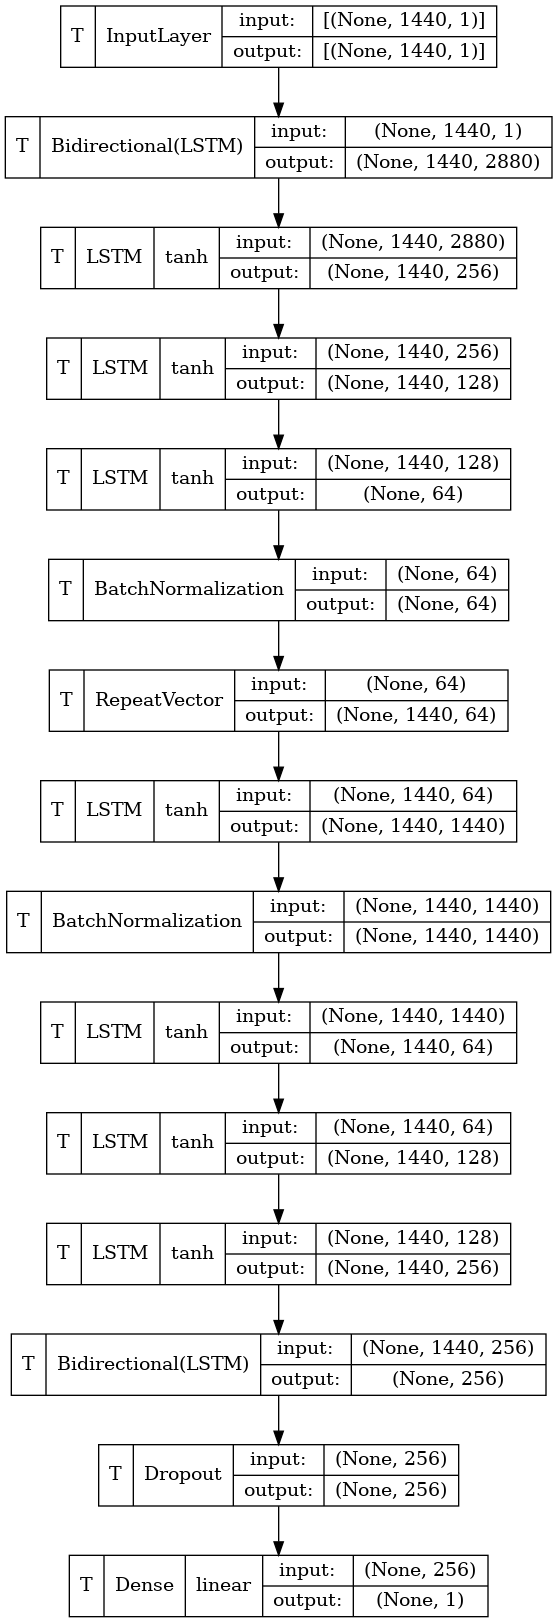

In [27]:
plot_model(encoder_decoder,
           show_shapes=True, 
           show_layer_names=False,
           show_layer_activations=True,
           show_trainable=True, 
           to_file=f'../reports/figures/architecture_{version}.png')

In [28]:
def save_partial_history(encoder_decoder: Model, file_path: str, version: str, overwrite=False):
    encoder_decoder_history = encoder_decoder.history.history
    loss = encoder_decoder_history['loss']
    val_loss = encoder_decoder_history['val_loss']
    epochs = len(loss)

    file_path = f"{file_path}/partial_history_{version}.json"

    if not overwrite:
        # Read the existing JSON data from the file
        try:
            with open(file_path, "r") as file:
                existing_data = json.load(file)
        except FileNotFoundError:
            existing_data = {'loss': [], 'val_loss': []}
    else:
        existing_data = {'loss': [], 'val_loss': []}

    existing_data['loss'].extend(loss)
    existing_data['val_loss'].extend(val_loss)

    # Write the combined data back to the JSON file
    with open(file_path, "w") as file:
        json.dump(existing_data, file, indent=4)

    print(f"\n{epochs} epoch metrics saved to partial_history_{version}.json")


In [29]:
# set conditions to stop training if the model begins to overfit
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=patience, 
                                                  mode='min',
                                                  restore_best_weights=True)

resume = tf.keras.callbacks.BackupAndRestore(backup_dir=f"../models/backups")
try:
    start = time.perf_counter()
    encoder_decoder_history = encoder_decoder.fit(X_train, y_train, 
                                                batch_size=batch, 
                                                epochs=epochs, 
                                                verbose=1,
                                                callbacks=[early_stopping, resume],
                                                validation_split=0.1)
    train_time = time.perf_counter() - start
except KeyboardInterrupt as e:
    save_partial_history(encoder_decoder, f"../models/partials", version)
    print(f"Model training interrupted: {e}")


Epoch 47/100


2023-10-22 03:50:35.974448: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-22 03:50:37.566721: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe232957670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-22 03:50:37.566739: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-10-22 03:50:37.572149: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-22 03:50:37.634472: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


875/875 [==============================] - 1909s 2s/step - loss: 6.2631e-04 - val_loss: 2.5385e-04
Epoch 48/100
875/875 [==============================] - 1893s 2s/step - loss: 6.7426e-04 - val_loss: 5.1017e-04
Epoch 49/100
875/875 [==============================] - 1882s 2s/step - loss: 6.3334e-04 - val_loss: 0.0012
Epoch 50/100
875/875 [==============================] - 1882s 2s/step - loss: 6.1799e-04 - val_loss: 4.0001e-04
Epoch 51/100
875/875 [==============================] - 1881s 2s/step - loss: 6.2815e-04 - val_loss: 5.4184e-04
Epoch 52/100
875/875 [==============================] - 1880s 2s/step - loss: 5.9477e-04 - val_loss: 3.3522e-04
Epoch 53/100
875/875 [==============================] - 1879s 2s/step - loss: 6.1371e-04 - val_loss: 5.7714e-04
Epoch 54/100
875/875 [==============================] - 1879s 2s/step - loss: 5.9341e-04 - val_loss: 2.8786e-04
Epoch 55/100
875/875 [==============================] - 1880s 2s/step - loss: 5.7591e-04 - val_loss: 2.4406e-04
Epoch 56/

In [30]:
# save the model and model history
encoder_decoder.save(f"../models/model_{version}.keras")

# Save the model history
import pickle

with open(f"../models/model_history_{version}.pkl", "wb") as f:
    pickle.dump(encoder_decoder_history.history, f)

In [31]:
encoder_decoder.history.history['loss']

[0.023819411173462868,
 0.009980172850191593,
 0.008757058531045914,
 0.010289325378835201,
 0.008028955198824406]

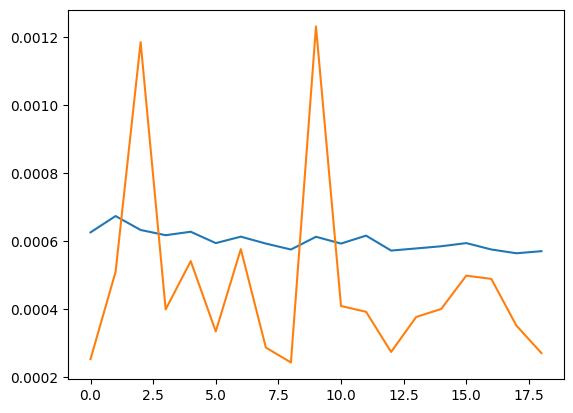

In [31]:
plt.figure()
plt.plot(encoder_decoder_history.history['loss'])
plt.plot(encoder_decoder_history.history['val_loss'])

In [33]:
# Load the model and model history

# Load the model
encoder_decoder = tf.keras.models.load_model(f"../models/model_{version}.keras")#, custom_objects={"Attention": Attention})

# Load the model history
with open(f"../models/model_history_{version}.pkl", "rb") as f:
    encoder_decoder_history = pickle.load(f)

In [36]:
# Plot saved
plt.figure()
plt.plot(encoder_decoder_history['loss'])
plt.plot(encoder_decoder_history['val_loss'])

NameError: name 'encoder_decoder_history' is not defined

<Figure size 640x480 with 0 Axes>

In [32]:
start = time.perf_counter()
yhat = encoder_decoder.predict(X_test)
infer_time = time.perf_counter() - start

152/152 [==============================] - 154s 1s/step


In [33]:
infer_time = infer_time/len(yhat)
print(round(infer_time, 4), "seconds")

0.0317 seconds


In [34]:
yhat.shape

(4858, 1)

In [35]:
y_test.shape

(4858, 1)

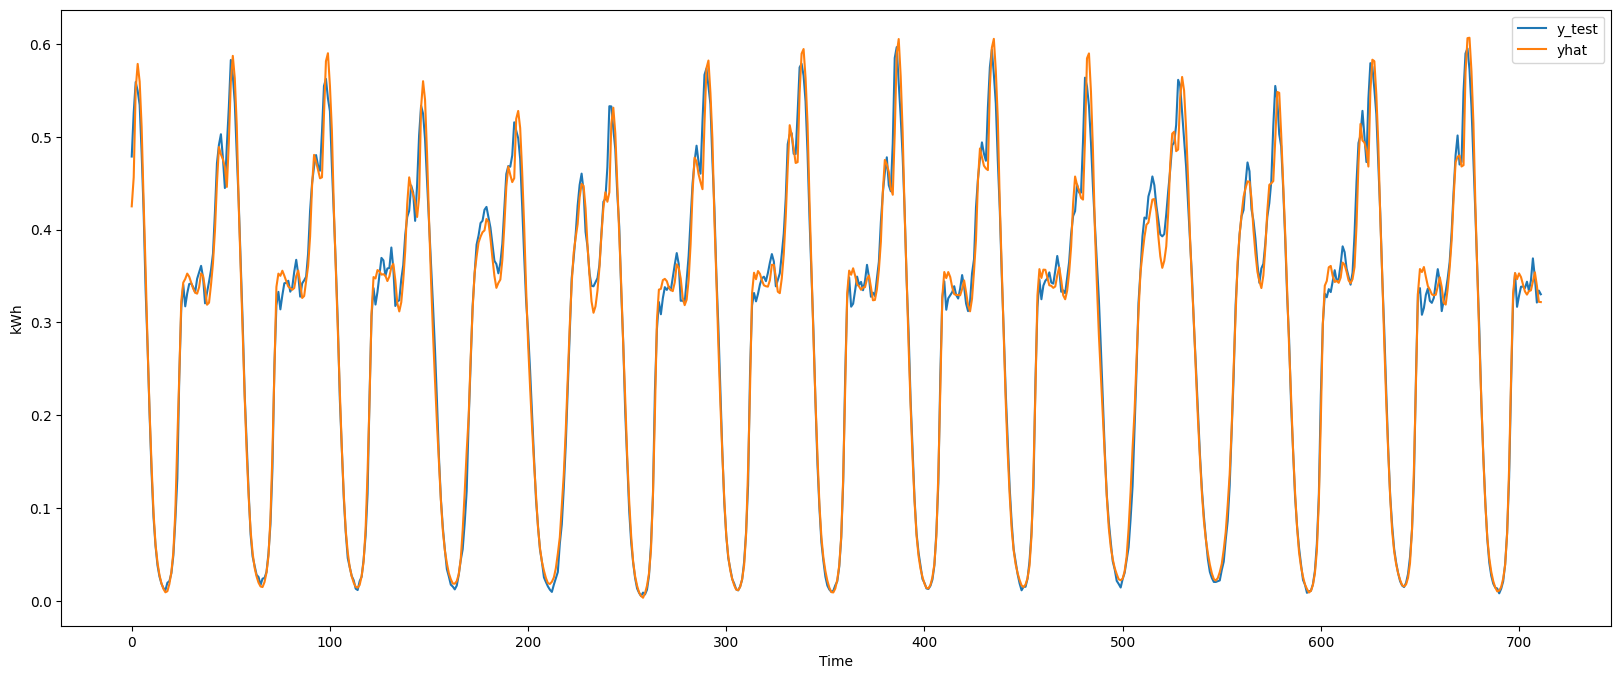

In [36]:
plt.figure(figsize=(20,8))
plt.plot(y_test[:712])
plt.plot(yhat[:712])
plt.legend(['y_test', 'yhat'])
plt.xlabel('Time')
plt.ylabel('kWh')
plt.savefig(f'../reports/figures/testplot_{version}.png')
plt.show()

In [37]:


def stat_eval(y_test: np.ndarray, yhat: np.ndarray):
    """
    Carries out statistical evaluation of model based on test data and 
    prediction. 
    
    Prints and returns a summary dictionary
    """
    # statistical evaluations
    
    print("="*5,"Statistical Eval","="*5,"\n")

    rmse = math.sqrt(mean_squared_error(yhat, y_test))

    print(f"Mean kWh: {round(np.mean(y_test), 4)} -- RMSE: {round(rmse, 4)}",
         f"-- RMSE < 10% Mean: ", round(rmse, 4)< round(np.mean(y_test), 4)/10)
    
    rmse_less_10 = 1 if round(rmse, 4)< round(np.mean(y_test), 4)/10 else 0
                    
    return rmse, rmse_less_10



In [38]:
def save_metrics(version: str, 
                 train_time: float, 
                 infer_time: float, 
                 rmse: float,
                 rmse_less_10: int,
                 file_path: str,
                 overwrite: bool = False
                 ):
    """
    Saves metrics to a JSON file.

    Parameters:
    version (str): Version identifier.
    train_time (float): Training time.
    infer_time (float): Inference time.
    rmse (float): Root Mean Squared Error.
    rmse_less_10 (bool): Boolean indicating if RMSE is less than 10.
    file_path (str): Path to the JSON file.
    overwrite (bool): If True, overwrite the existing file.

    Returns:
    None
    """
    new_metrics = {
        "version": version,
        "metrics": {
            "train_time": train_time,
            "infer_time": infer_time,
            "rmse": rmse,
            "rmse_less_10": rmse_less_10
        }
    }

    file_path = f"{file_path}/metrics.json"

    if not overwrite:
        # Read the existing JSON data from the file
        try:
            with open(file_path, "r") as file:
                existing_data = json.load(file)
        except FileNotFoundError:
            existing_data = []
    else:
        existing_data = []

    # Check if the new metrics already exist, and only append if not
    if new_metrics not in existing_data:
        existing_data.append(new_metrics)

        # Write the combined data back to the JSON file
        with open(file_path, "w") as file:
            json.dump(existing_data, file, indent=4)

        print("Metrics saved to the JSON file.")
    else:
        print("Metrics already exist in the JSON file.")

In [39]:
rmse, rmse_less_10 = stat_eval(y_test=y_test, yhat=yhat)

===== Statistical Eval ===== 

Mean kWh: 0.363 -- RMSE: 0.0197 -- RMSE < 10% Mean:  True


In [40]:
# ===== Statistical Eval ===== 

# Mean kWh: 0.284 -- RMSE: 0.1553 -- RMSE < 10% Mean:  False
# 0.15525123492978649

In [41]:
save_metrics(version=version, 
             train_time=train_time, 
             infer_time=infer_time, 
             rmse=rmse,
             rmse_less_10=rmse_less_10,
             file_path="../reports",
             overwrite=False)

Metrics saved to the JSON file.


#### Forecasting